## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.644568  1.556822  0.016101 -0.241324 -1.341438 -1.926845
1 -1.613495  0.104939 -0.465255  1.352236  0.626858 -0.237880
2  0.159326  0.812658  1.465714  0.279823  0.410946  1.888798
3 -1.363108 -0.104078  0.341363 -0.448569  0.733460 -1.153275
4 -0.556337  0.090298  0.858730 -0.868251  1.607633  0.074837


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9827423	total: 57.3ms	remaining: 57.2s
1:	learn: 0.9738006	total: 57.9ms	remaining: 28.9s
2:	learn: 0.9648360	total: 58.4ms	remaining: 19.4s
3:	learn: 0.9547608	total: 58.9ms	remaining: 14.7s
4:	learn: 0.9480511	total: 59.5ms	remaining: 11.8s
5:	learn: 0.9388761	total: 59.9ms	remaining: 9.93s
6:	learn: 0.9311491	total: 60.4ms	remaining: 8.57s
7:	learn: 0.9238320	total: 61.1ms	remaining: 7.57s
8:	learn: 0.9173254	total: 61.7ms	remaining: 6.79s
9:	learn: 0.9078975	total: 62.3ms	remaining: 6.17s
10:	learn: 0.8998936	total: 62.9ms	remaining: 5.66s
11:	learn: 0.8902527	total: 63.6ms	remaining: 5.24s
12:	learn: 0.8826936	total: 64.4ms	remaining: 4.89s
13:	learn: 0.8734549	total: 64.8ms	remaining: 4.56s
14:	learn: 0.8665216	total: 65.2ms	remaining: 4.28s
15:	learn: 0.8596026	total: 65.7ms	remaining: 4.04s
16:	learn: 0.8512450	total: 66.1ms	remaining: 3.82s
17:	learn: 0.8460385	total: 66.6ms	remaining: 3.63s
18:	learn: 0.8374281	total: 67.1ms	remaining

90:	learn: 0.4682019	total: 102ms	remaining: 1.01s
91:	learn: 0.4646812	total: 102ms	remaining: 1.01s
92:	learn: 0.4616752	total: 103ms	remaining: 1s
93:	learn: 0.4575065	total: 103ms	remaining: 995ms
94:	learn: 0.4548022	total: 104ms	remaining: 988ms
95:	learn: 0.4517545	total: 104ms	remaining: 980ms
96:	learn: 0.4490401	total: 104ms	remaining: 973ms
97:	learn: 0.4458334	total: 105ms	remaining: 967ms
98:	learn: 0.4429175	total: 105ms	remaining: 960ms
99:	learn: 0.4396804	total: 106ms	remaining: 954ms
100:	learn: 0.4368210	total: 106ms	remaining: 948ms
101:	learn: 0.4337247	total: 107ms	remaining: 942ms
102:	learn: 0.4307647	total: 107ms	remaining: 936ms
103:	learn: 0.4271471	total: 108ms	remaining: 930ms
104:	learn: 0.4240671	total: 108ms	remaining: 923ms
105:	learn: 0.4209766	total: 109ms	remaining: 917ms
106:	learn: 0.4179917	total: 109ms	remaining: 912ms
107:	learn: 0.4151721	total: 110ms	remaining: 907ms
108:	learn: 0.4126463	total: 110ms	remaining: 902ms
109:	learn: 0.4102885	tot

224:	learn: 0.2051669	total: 171ms	remaining: 590ms
225:	learn: 0.2038823	total: 172ms	remaining: 589ms
226:	learn: 0.2025759	total: 172ms	remaining: 587ms
227:	learn: 0.2013070	total: 173ms	remaining: 586ms
228:	learn: 0.1999937	total: 174ms	remaining: 585ms
229:	learn: 0.1986221	total: 174ms	remaining: 583ms
230:	learn: 0.1973873	total: 175ms	remaining: 582ms
231:	learn: 0.1961126	total: 175ms	remaining: 580ms
232:	learn: 0.1951810	total: 176ms	remaining: 578ms
233:	learn: 0.1942628	total: 176ms	remaining: 577ms
234:	learn: 0.1931847	total: 177ms	remaining: 575ms
235:	learn: 0.1923924	total: 177ms	remaining: 574ms
236:	learn: 0.1913770	total: 178ms	remaining: 573ms
237:	learn: 0.1903267	total: 178ms	remaining: 571ms
238:	learn: 0.1895103	total: 179ms	remaining: 569ms
239:	learn: 0.1884976	total: 179ms	remaining: 568ms
240:	learn: 0.1873329	total: 180ms	remaining: 567ms
241:	learn: 0.1861574	total: 181ms	remaining: 566ms
242:	learn: 0.1850146	total: 181ms	remaining: 564ms
243:	learn: 

446:	learn: 0.0582255	total: 285ms	remaining: 353ms
447:	learn: 0.0580072	total: 285ms	remaining: 352ms
448:	learn: 0.0576386	total: 286ms	remaining: 351ms
449:	learn: 0.0575109	total: 286ms	remaining: 350ms
450:	learn: 0.0571488	total: 287ms	remaining: 349ms
451:	learn: 0.0570238	total: 287ms	remaining: 348ms
452:	learn: 0.0567317	total: 288ms	remaining: 348ms
453:	learn: 0.0565309	total: 288ms	remaining: 347ms
454:	learn: 0.0561782	total: 289ms	remaining: 346ms
455:	learn: 0.0558665	total: 290ms	remaining: 345ms
456:	learn: 0.0556729	total: 290ms	remaining: 345ms
457:	learn: 0.0553529	total: 291ms	remaining: 344ms
458:	learn: 0.0552389	total: 291ms	remaining: 343ms
459:	learn: 0.0548991	total: 291ms	remaining: 342ms
460:	learn: 0.0546981	total: 292ms	remaining: 341ms
461:	learn: 0.0544919	total: 292ms	remaining: 340ms
462:	learn: 0.0541599	total: 293ms	remaining: 339ms
463:	learn: 0.0539644	total: 293ms	remaining: 339ms
464:	learn: 0.0536387	total: 294ms	remaining: 338ms
465:	learn: 

586:	learn: 0.0291044	total: 355ms	remaining: 250ms
587:	learn: 0.0289519	total: 356ms	remaining: 249ms
588:	learn: 0.0287721	total: 356ms	remaining: 248ms
589:	learn: 0.0286076	total: 356ms	remaining: 248ms
590:	learn: 0.0284321	total: 357ms	remaining: 247ms
591:	learn: 0.0282827	total: 358ms	remaining: 246ms
592:	learn: 0.0281854	total: 358ms	remaining: 246ms
593:	learn: 0.0280256	total: 359ms	remaining: 245ms
594:	learn: 0.0278598	total: 359ms	remaining: 244ms
595:	learn: 0.0277034	total: 360ms	remaining: 244ms
596:	learn: 0.0275796	total: 360ms	remaining: 243ms
597:	learn: 0.0274274	total: 361ms	remaining: 242ms
598:	learn: 0.0272496	total: 361ms	remaining: 242ms
599:	learn: 0.0271006	total: 361ms	remaining: 241ms
600:	learn: 0.0269273	total: 362ms	remaining: 240ms
601:	learn: 0.0268343	total: 362ms	remaining: 239ms
602:	learn: 0.0266885	total: 363ms	remaining: 239ms
603:	learn: 0.0265515	total: 363ms	remaining: 238ms
604:	learn: 0.0264471	total: 364ms	remaining: 238ms
605:	learn: 

822:	learn: 0.0110597	total: 470ms	remaining: 101ms
823:	learn: 0.0110253	total: 471ms	remaining: 101ms
824:	learn: 0.0109773	total: 471ms	remaining: 99.9ms
825:	learn: 0.0109392	total: 472ms	remaining: 99.3ms
826:	learn: 0.0109020	total: 472ms	remaining: 98.8ms
827:	learn: 0.0108463	total: 473ms	remaining: 98.2ms
828:	learn: 0.0108100	total: 473ms	remaining: 97.6ms
829:	learn: 0.0107534	total: 474ms	remaining: 97ms
830:	learn: 0.0107274	total: 474ms	remaining: 96.4ms
831:	learn: 0.0106814	total: 475ms	remaining: 95.9ms
832:	learn: 0.0106244	total: 475ms	remaining: 95.2ms
833:	learn: 0.0105709	total: 476ms	remaining: 94.7ms
834:	learn: 0.0105027	total: 476ms	remaining: 94.1ms
835:	learn: 0.0104776	total: 477ms	remaining: 93.5ms
836:	learn: 0.0104332	total: 477ms	remaining: 92.9ms
837:	learn: 0.0103922	total: 478ms	remaining: 92.3ms
838:	learn: 0.0103460	total: 478ms	remaining: 91.8ms
839:	learn: 0.0102952	total: 479ms	remaining: 91.2ms
840:	learn: 0.0102716	total: 479ms	remaining: 90.6

961:	learn: 0.0060718	total: 540ms	remaining: 21.3ms
962:	learn: 0.0060470	total: 541ms	remaining: 20.8ms
963:	learn: 0.0060220	total: 541ms	remaining: 20.2ms
964:	learn: 0.0059989	total: 542ms	remaining: 19.7ms
965:	learn: 0.0059744	total: 543ms	remaining: 19.1ms
966:	learn: 0.0059506	total: 543ms	remaining: 18.5ms
967:	learn: 0.0059327	total: 544ms	remaining: 18ms
968:	learn: 0.0059089	total: 544ms	remaining: 17.4ms
969:	learn: 0.0058862	total: 545ms	remaining: 16.8ms
970:	learn: 0.0058624	total: 545ms	remaining: 16.3ms
971:	learn: 0.0058390	total: 546ms	remaining: 15.7ms
972:	learn: 0.0058216	total: 546ms	remaining: 15.2ms
973:	learn: 0.0058095	total: 547ms	remaining: 14.6ms
974:	learn: 0.0057841	total: 547ms	remaining: 14ms
975:	learn: 0.0057616	total: 548ms	remaining: 13.5ms
976:	learn: 0.0057449	total: 548ms	remaining: 12.9ms
977:	learn: 0.0057331	total: 549ms	remaining: 12.3ms
978:	learn: 0.0057003	total: 549ms	remaining: 11.8ms
979:	learn: 0.0056681	total: 550ms	remaining: 11.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

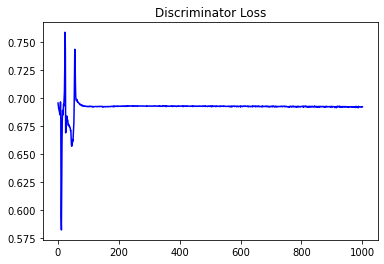

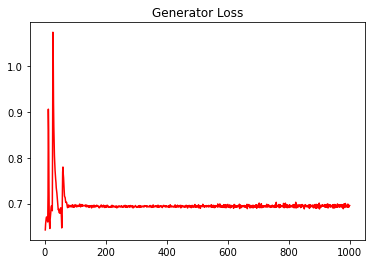

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.09284513689623727


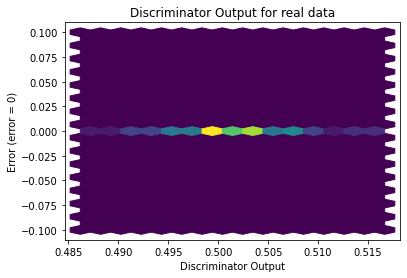

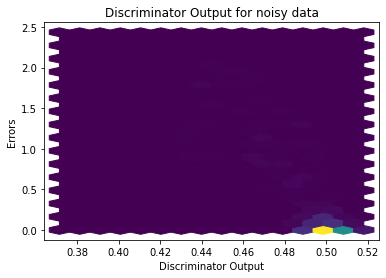

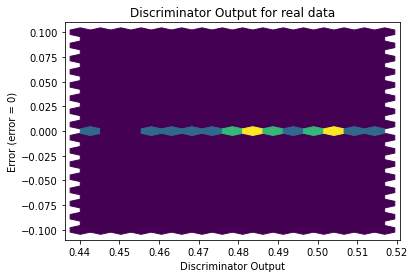

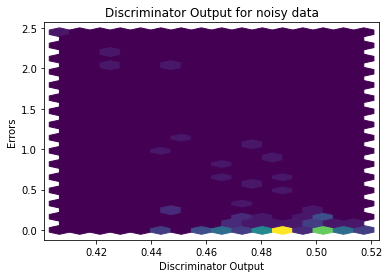

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


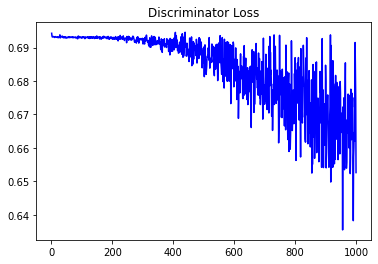

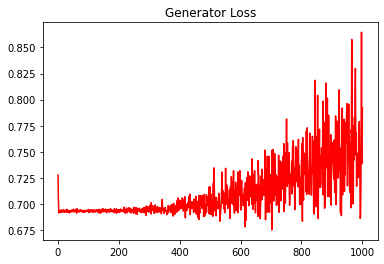

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.13913799385737216


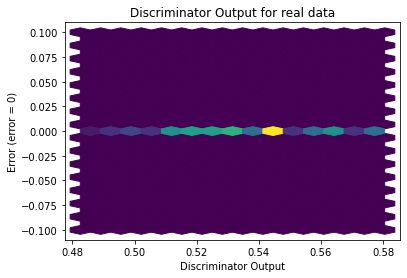

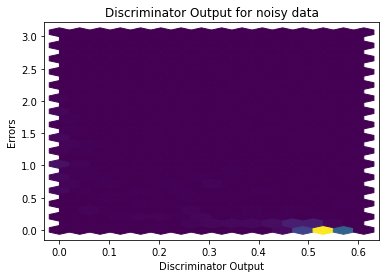

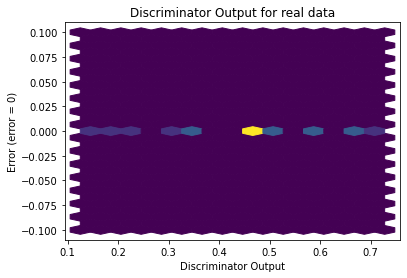

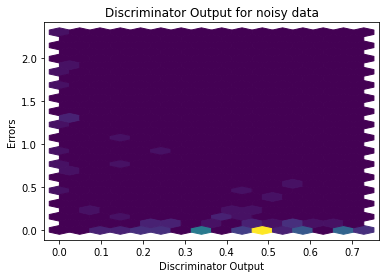

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
